# **DeepWine**: optimización de la calidad del vino mediante algoritmos genéticos

### **Autores**:
- Luis Mario Toscano Palomino - 2220072
- Oscar Carreño Serpa - 2220039
- Daniel Santiago Convers - 2221120

# **Motivación**

El análisis de la calidad del vino tinto es un desafío importante tanto para enólogos como para productores. Factores como la acidez, el contenido de alcohol y los compuestos químicos influyen directamente en la percepción del sabor y la calidad del vino. Con el avance de la ciencia de datos y la inteligencia artificial, es posible analizar grandes volúmenes de información para identificar patrones y relaciones entre estas variables. Este proyecto busca aprovechar estas tecnologías para comprender mejor qué características contribuyen a la calidad del vino y cómo optimizar su producción de manera más precisa y eficiente.

# **Objetivo**

El propósito de este proyecto es aplicar técnicas de análisis de datos y aprendizaje automático para identificar los factores más influyentes en la calidad del vino tinto. A través del estudio de las variables presentes en el dataset, se busca desarrollar modelos que permitan predecir la calidad de un vino basándose en sus características químicas. Esto no solo ayudará a mejorar los procesos de producción, sino que también proporcionará información valiosa para la industria vitivinícola, permitiendo la elaboración de vinos de mayor calidad mediante la optimización de sus componentes.

# **Información del dataset**

El dataset contiene información sobre diversas propiedades fisicoquímicas del vino tinto y su calidad. A continuación, se detallan las variables incluidas:

Características Fisicoquímicas

* Acidez Fija (float64) : Representa la cantidad total de ácidos no volátiles en el vino, como el ácido tartárico, málico y cítrico.

* Acidez Volátil (float64) : Mide la cantidad de ácidos volátiles, principalmente ácido acético, en el vino.

* Ácido Cítrico (float64) : Es un ácido presente de forma natural en las uvas y contribuye al sabor fresco y cítrico del vino.

* Azúcar Residual (float64): Indica la cantidad de azúcar que queda en el vino después de la fermentación.

* Cloruros (float64): Representan la cantidad de sales cloruro en el vino, principalmente cloruro de sodio.

* Dióxido de Azufre Libre (float64): Es la cantidad de dióxido de azufre (SO2) que se encuentra en forma libre en el vino.

* Dióxido de Azufre Total (float64): Es la cantidad total de dióxido de azufre (SO2) presente en el vino, incluyendo el dióxido de azufre libre y el dióxido de azufre combinado.

* Densidad (float64): Mide la masa del vino por unidad de volumen

* pH (float64): Mide la acidez o alcalinidad del vino.

* Sulfatos (float64): Representan la cantidad de sales de sulfato en el vino, principalmente sulfato de potasio.

* Alcohol (float64): Es el producto de la fermentación del azúcar por las levaduras y  Contribuye a la calidez y la complejidad del vino.

* Calidad (Integer): Es una evaluación subjetiva de la calidad del vino, basada en pruebas sensoriales.


# **1. Carga del dataset y librerias**
Para dar inicio al proyecto, se procedió a la carga del conjunto de datos 'Red Wine Quality' desde la plataforma Kaggle. Se empleó la biblioteca kagglehub, la cual facilitó la importación directa del archivo 'winequality-red.csv' al entorno de Google Colab. La función load_dataset del módulo KaggleDatasetAdapter.PANDAS fue instrumental en este proceso, permitiendo la creación de un DataFrame de Pandas, denominado 'df', que alberga la información necesaria para el análisis y la posterior implementación de algoritmos genéticos. Este método asegura la preparación para las etapas de preprocesamiento y modelado del proyecto.

In [ ]:
#@title Carga del dataset y librerias
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the path to the file you'd like to load
file_path = "winequality-red.csv"

# Load the latest version
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "uciml/red-wine-quality-cortez-et-al-2009",
    file_path,
)

print("\nTamaño del DataFrame:")
df.shape

<ipython-input-1-8586262fd0dd>:13: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(



Tamaño del DataFrame:


(1599, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#@title Revision de datos nulos en las columnas
print("Valores nulos en cada columna:")
df.isnull().sum()

Valores nulos en cada columna:


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# **2. Obtener el "describe" del dataset**

Tras la carga del conjunto de datos 'Red Wine Quality', se procedió a generar el análisis descriptivo de las variables numéricas mediante la función .describe() de la biblioteca Pandas. Este proceso reveló estadísticas clave para cada columna: se observó que la acidez fija (fixed acidity) presenta una media de 8.32, con una desviación estándar de 1.74, indicando una variabilidad moderada. La acidez volátil (volatile acidity) muestra una media de 0.53, con un rango que oscila entre 0.12 y 1.58, sugiriendo una amplia dispersión. El contenido de alcohol (alcohol) presenta una media de 10.42, con una desviación estándar de 1.07, lo que indica una distribución relativamente homogénea. La calidad (quality) del vino, medida en una escala de 3 a 8, muestra una media de 5.64, con una desviación estándar de 0.81, revelando una tendencia a concentrarse en valores intermedios. Además, se identificaron valores mínimos y máximos para cada variable, lo que permite comprender mejor los límites del conjunto de datos.



In [ ]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

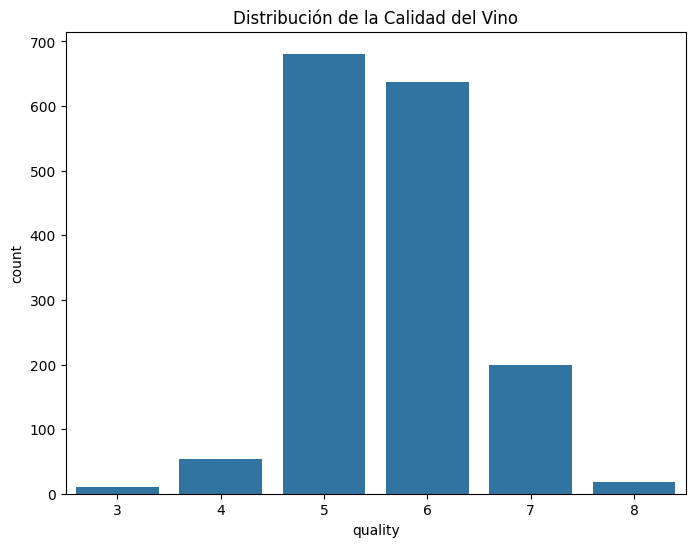

In [ ]:
#@title  Distribución de la variable objetivo (quality)
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df)
plt.title('Distribución de la Calidad del Vino')
plt.show()

# **3. ANALISIS DEL DATASET**

 **Analisis de distribucion de la calidad de los vinos**

La mayoría de los vinos tienen una calidad moderada (5 y 6), con pocos vinos de calidad muy alta o muy baja.

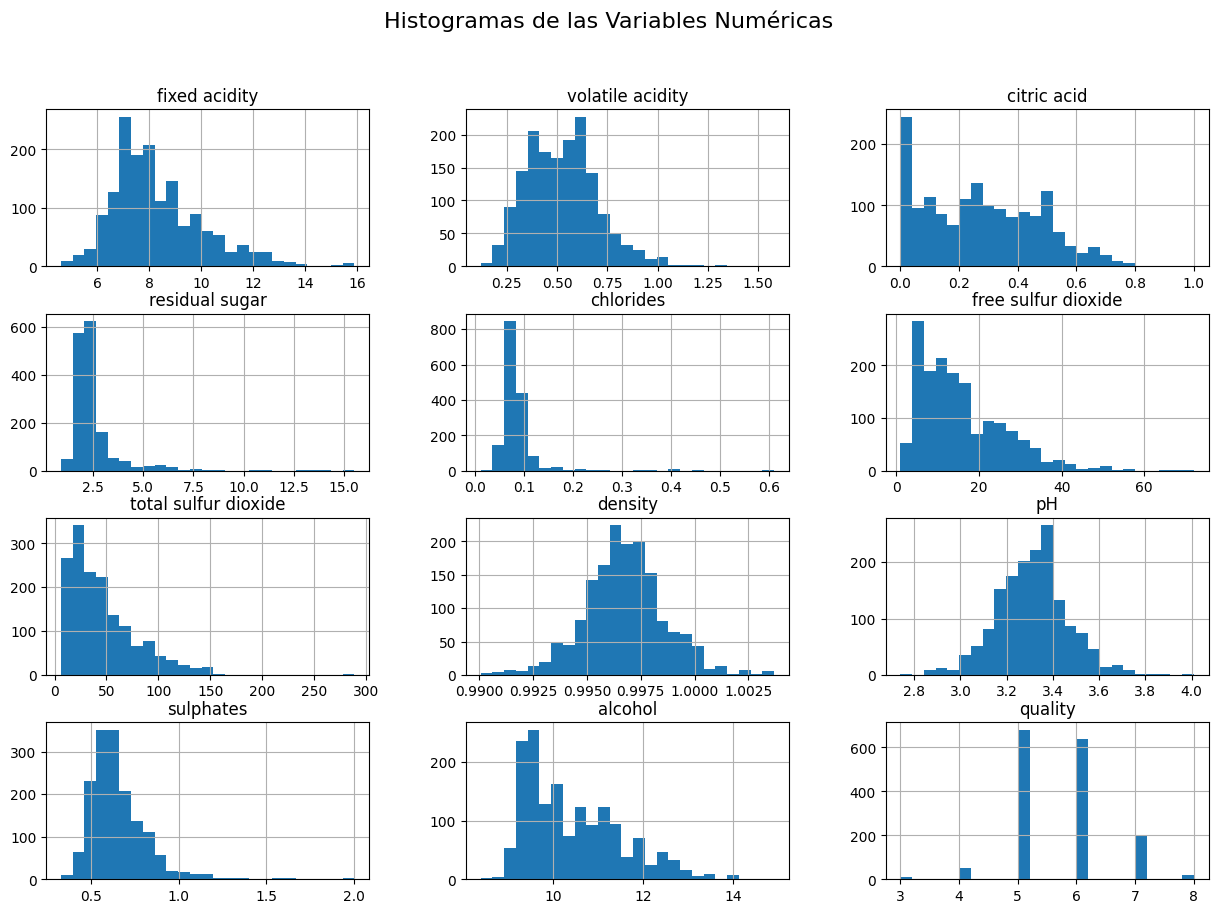

In [ ]:
#@title Histogramas de las variables numéricas
df.hist(bins=25, figsize=(15, 10))
plt.suptitle('Histogramas de las Variables Numéricas', fontsize=16)
plt.show()

 **Analisis Histogramas**

Los histogramas de las variables numéricas proporcionan una visión detallada de la distribución de cada característica fisicoquímica en el conjunto de datos 'Red Wine Quality'. Se observa que algunas variables, como 'fixed acidity', 'volatile acidity' y 'pH', presentan distribuciones aproximadamente normales, mientras que otras, como 'residual sugar', 'chlorides' y 'total sulfur dioxide', muestran distribuciones sesgadas hacia la derecha, indicando la presencia de valores atípicos o una mayor concentración de datos en valores bajos. Al comparar la distribución de las características fisicoquímicas con la calidad del vino, se pueden identificar tendencias interesantes. Por ejemplo, se observa que los vinos de alta calidad tienden a tener un mayor contenido de alcohol y una menor acidez volátil. Estas observaciones resaltan la importancia de considerar la distribución de las variables y su relación con la calidad del vino en el análisis y modelado.

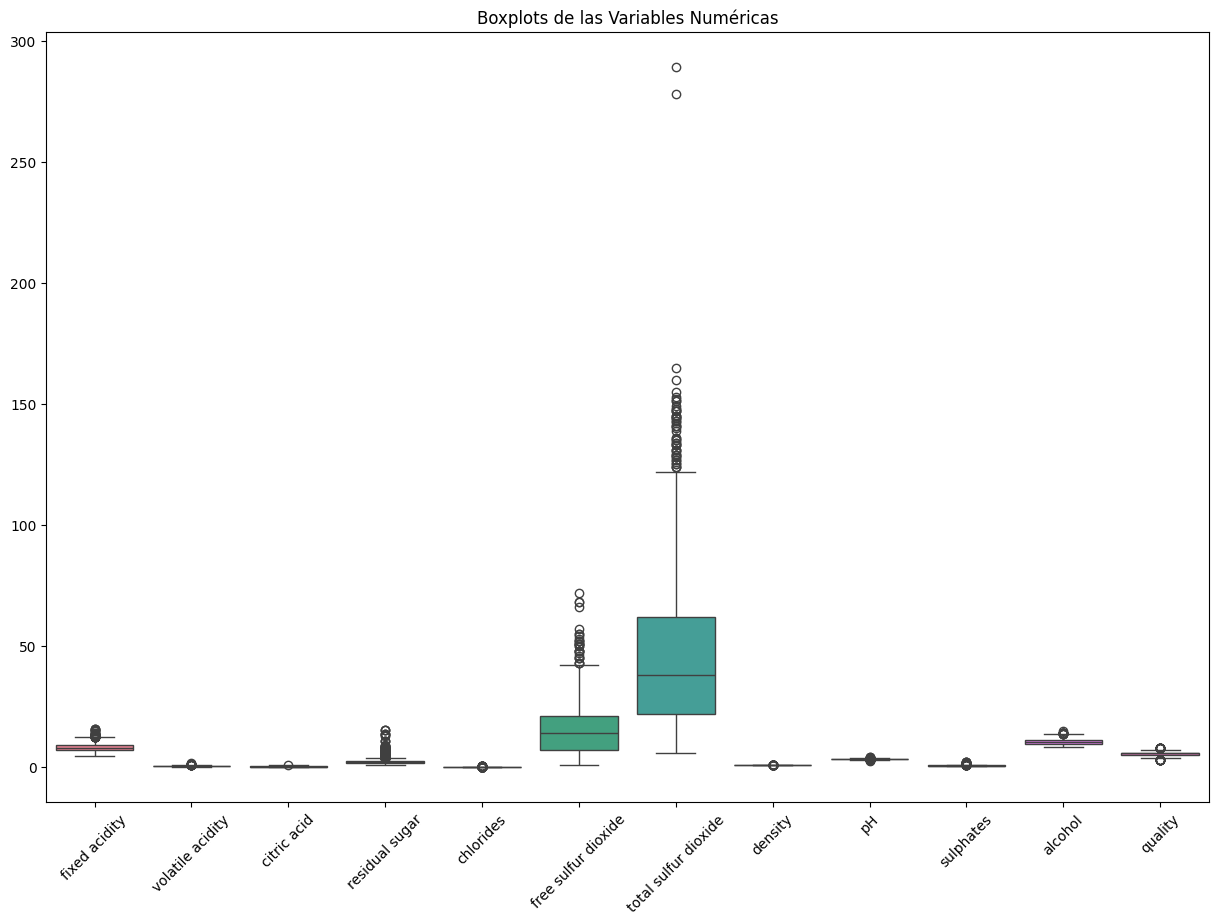

In [ ]:
#@title Boxplots para identificar outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Boxplots de las Variables Numéricas')
plt.xticks(rotation=45)
plt.show()

 **Analisis del boxplot**

El boxplot de las variables numéricas revela la presencia de valores atípicos en diversas características fisicoquímicas del vino tinto, particularmente en 'free sulfur dioxide' y 'total sulfur dioxide'. Estos valores atípicos, representados por puntos fuera de los bigotes de los boxplots, indican mediciones que se desvían significativamente de la distribución general de los datos. Además, el boxplot muestra la distribución de cada variable a través de sus cuartiles, mediana y rango intercuartílico, permitiendo una comparación visual de la dispersión y la simetría de los datos entre las distintas características fisicoquímicas. La presencia de valores atípicos y las diferencias en la distribución de las variables resaltan la importancia de considerar estas características en el análisis y modelado de la calidad del vino.

 **3. Generar el mapa de correlaciones**

Con el objetivo de comprender las relaciones entre las variables del conjunto de datos 'Red Wine Quality', se generó un mapa de correlaciones utilizando la función corr() de la biblioteca Pandas y la visualización heatmap de Seaborn.

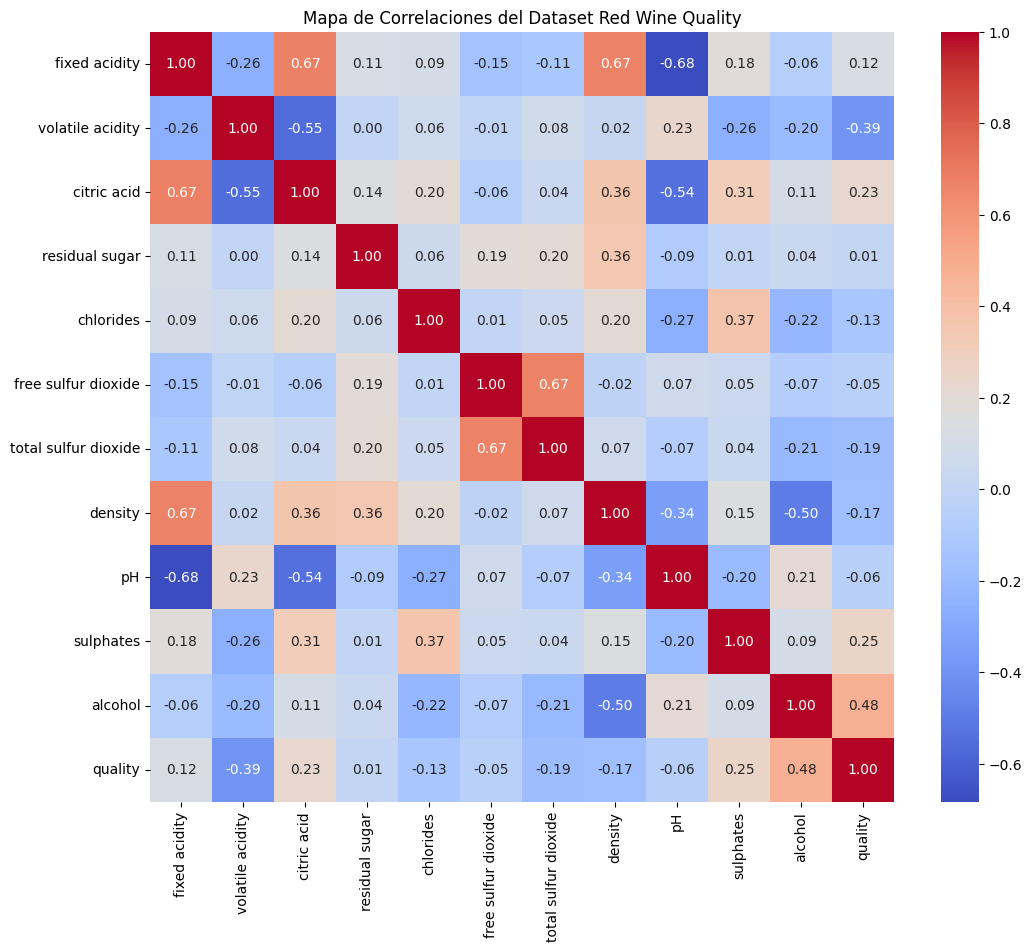

In [ ]:
#@title  Generar el mapa de correlaciones
#title print("\nMapa de Correlaciones:")
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlaciones del Dataset Red Wine Quality')
plt.show()

 **Analisis de correlaciones**

El mapa resultante revela patrones de correlación significativos: se observa una correlación positiva moderada entre el contenido de alcohol (alcohol) y la calidad del vino (quality), con un valor de 0.48, lo que sugiere que un mayor contenido de alcohol tiende a asociarse con una mayor calidad. Asimismo, se identifica una correlación negativa entre la acidez volátil (volatile acidity) y la calidad (-0.39), indicando que una mayor acidez volátil se relaciona con una menor calidad. Además, se confirma la presencia de multicolinealidad entre variables como la acidez fija (fixed acidity) y el ácido cítrico (citric acid), con una correlación de 0.67, y entre el dióxido de azufre total (total sulfur dioxide) y el dióxido de azufre libre (free sulfur dioxide), también con un valor de 0.67. El mapa de correlaciones proporciona una visión clara de las interdependencias entre las variables, lo que resulta fundamental para la selección de características y la posterior implementación de algoritmos genéticos en el proyecto.

El resultado revela además, que, si bien existen relaciones significativas entre las diversas propiedades fisicoquímicas del vino tinto, la correlación individual de cada una de estas variables con la calidad del vino es relativamente baja. Este fenómeno sugiere que la calidad del vino no depende de una sola característica aislada, sino más bien de la interacción y el equilibrio entre todas ellas. La complejidad de la calidad del vino radica en la armonización de estas propiedades en pro de lograr un perfil sensorial óptimo. Para contextualizar, según estandares de catadores, un alto contenido de alcohol puede ser deseable, pero debe equilibrarse con la acidez y otros componentes para evitar un sabor desequilibrado. En consecuencia, la optimización de la calidad del vino requiere un enfoque holístico que considere la interacción de todas las variables, en lugar de centrarse en una sola característica.

En conclusión, al analizar los vinos se denota que la acidez fija y el nivel de alcohol son bastante homogéneos, lo que indica cierta estabilidad en su composición. Sin embargo, la acidez volátil varía significativamente, lo que puede influir en el sabor, haciéndolo más fuerte o más suave según el caso (Si la acidez volátil es demasiado alta, el vino puede tener un sabor avinagrado o demasiado agresivo, lo que se considera un defecto. Por otro lado, si la acidez volátil es muy baja, el vino puede resultar plano o sin vida, perdiendo frescura y complejidad.). En cuanto a la calidad, la mayoría de los vinos se encuentran en un nivel intermedio, lo que sugiere que, en general, son aceptables pero no están en los niveles de mejor puntuación. Esto nos da una idea clara de las características principales de estos vinos y cómo pueden diferir entre sí.

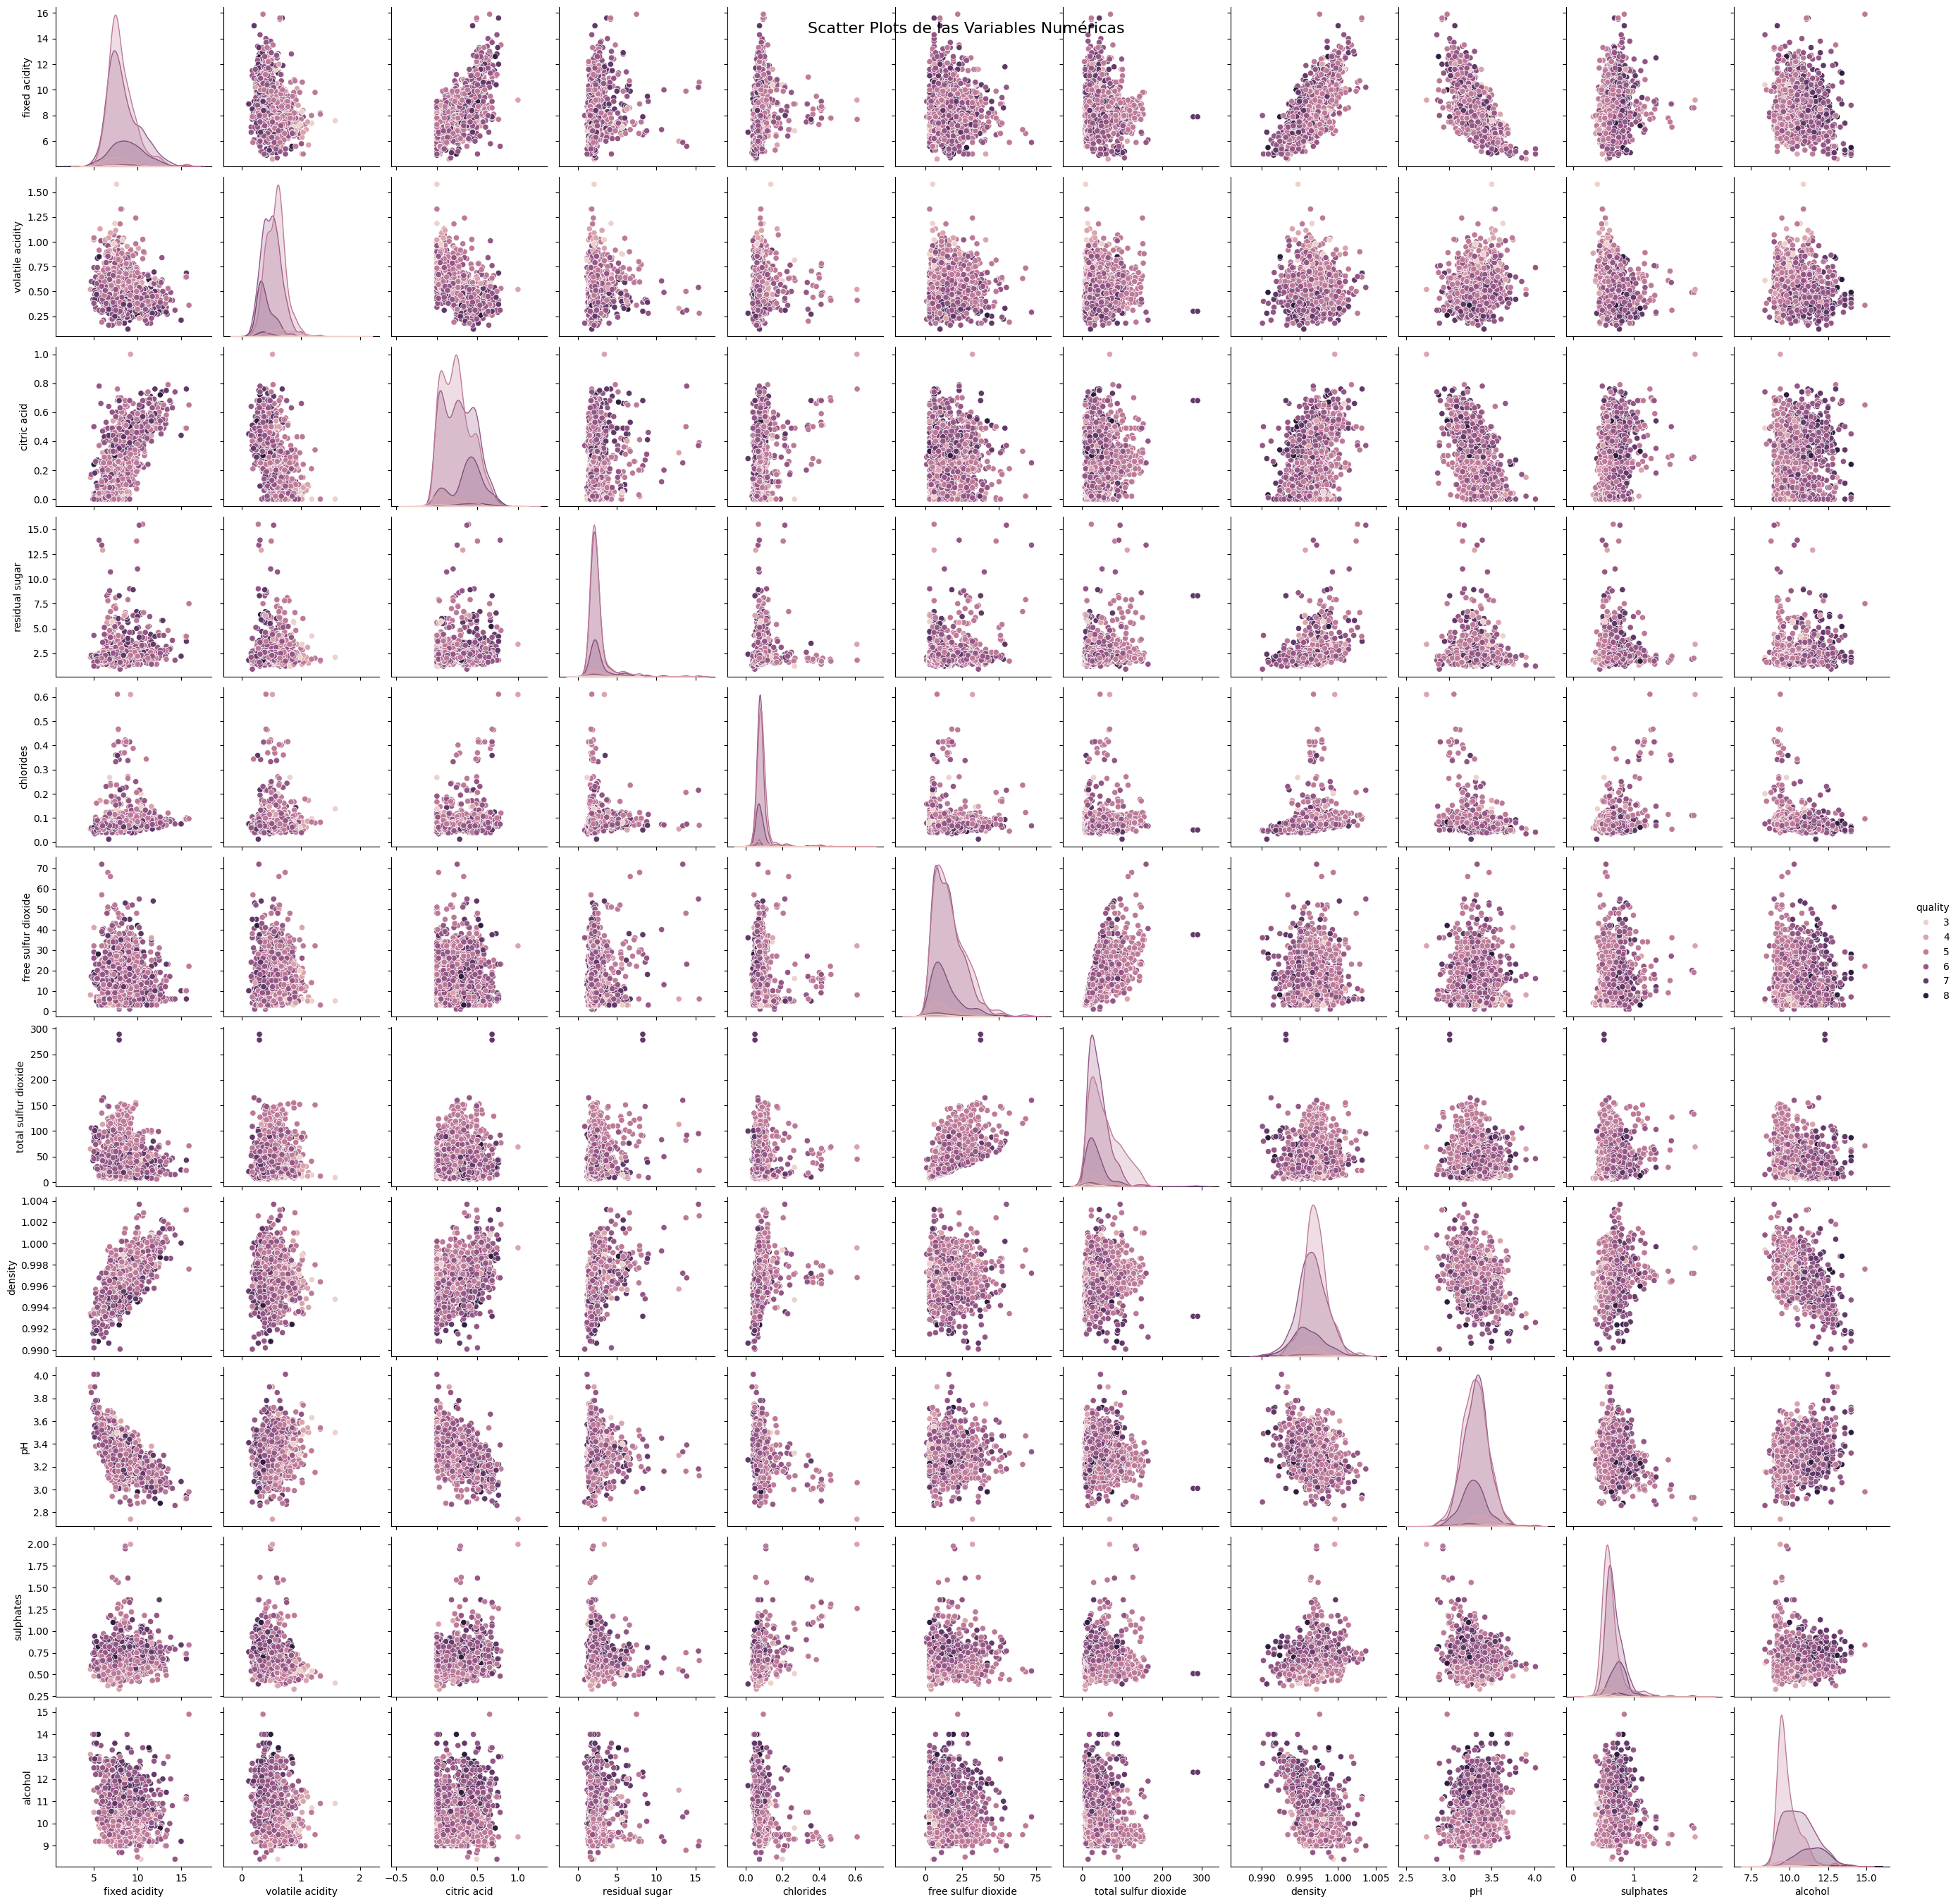

In [ ]:
#@title Scatter plots para visualizar relaciones entre variables
sns.pairplot(df, hue='quality')
plt.suptitle('Scatter Plots de las Variables Numéricas', fontsize=16)
plt.show()

# **4. ALGORITMO GENETICO**

In [ ]:
#@title Propuesta de algoritmo genético
# Normalización de los datos (excepto de 'quality')
features = df.drop(columns=['quality'])
features = (features - features.min()) / (features.max() - features.min())
target = df['quality']


In [ ]:
#@title **Funciones del algoritmo**
def initialize_population(size, num_features):
    """Inicializa la población con valores aleatorios entre 0 y 1."""
    return np.random.rand(size, num_features)

def evaluate_fitness(population, features, target):
    """Evalúa la aptitud de cada individuo en la población."""
    fitness = []
    for individual in population:
        weighted_sum = np.dot(features, individual)
        correlation = np.corrcoef(weighted_sum, target)[0, 1]
        fitness.append(correlation)
    return np.array(fitness)

def selection(population, fitness):
    """Selecciona los dos mejores individuos de la población."""
    selected_indices = np.argsort(fitness)[-2:]
    selected_population = population[selected_indices]
    print("\nSeleccionados:")
    print(pd.DataFrame(selected_population, columns=features.columns))
    return selected_population

def crossover(parents):
    """Realiza el cruce entre los padres seleccionados."""
    offspring = np.zeros((2, parents.shape[1]))
    crossover_point = np.random.randint(1, parents.shape[1])
    offspring[0, :crossover_point] = parents[0, :crossover_point]
    offspring[0, crossover_point:] = parents[1, crossover_point:]
    offspring[1, :crossover_point] = parents[1, :crossover_point]
    offspring[1, crossover_point:] = parents[0, crossover_point:]
    print("\nCrossover realizado con los siguientes padres:")
    print(pd.DataFrame(parents, columns=features.columns))
    return offspring

def mutation(offspring, mutation_rate=0.2):
    """Aplica mutación a los descendientes."""
    for individual in offspring:
        for gene in range(len(individual)):
            if np.random.rand() < mutation_rate:
                individual[gene] += np.random.uniform(-0.1, 0.1)
                individual[gene] = np.clip(individual[gene], 0, 1)
    print("\nMutación aplicada a los siguientes individuos:")
    print("Hijo 1:")
    print(pd.DataFrame([offspring[0]], columns=features.columns))
    print("Hijo 2:")
    print(pd.DataFrame([offspring[1]], columns=features.columns))
    return offspring

In [ ]:
#@title **Ejecución del algoritmo**
def genetic_algorithm(features, target, pop_size=20):
    """Ejecuta un ciclo de selección, cruce y mutación en la población."""
    num_features = features.shape[1]
    population = initialize_population(pop_size, num_features)
    fitness = evaluate_fitness(population, features, target)
    parents = selection(population, fitness)
    offspring = crossover(parents)
    offspring = mutation(offspring)
    print("\nDescendencia final:")
    print("Hijo 1:")
    print(pd.DataFrame([offspring[0]], columns=features.columns))
    print("Hijo 2:")
    print(pd.DataFrame([offspring[1]], columns=features.columns))
    return offspring

best_offspring = genetic_algorithm(features, target)
print("\nMejores hijos generados:")
print("Hijo 1:")
print(pd.DataFrame([best_offspring[0]], columns=features.columns))
print("Hijo 2:")
print(pd.DataFrame([best_offspring[1]], columns=features.columns))



Seleccionados:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.357525          0.021132     0.349489        0.032117   0.261241   
1       0.317018          0.099010     0.687831        0.285188   0.925995   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.001880              0.579204  0.451114  0.587616   0.117978   
1             0.611736              0.518574  0.012083  0.947983   0.417009   

    alcohol  
0  0.639505  
1  0.872351  

Crossover realizado con los siguientes padres:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.357525          0.021132     0.349489        0.032117   0.261241   
1       0.317018          0.099010     0.687831        0.285188   0.925995   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.001880              0.579204  0.451114  0.587616   0.117978   
1             0.611736      

Se genera una población inicial de individuos (cada uno representando una combinación aleatoria de pesos para las características del vino).

Cada individuo es evaluado en función de su *fitness*, calculado mediante la correlación entre su combinación de características y la calidad real del vino. Los dos individuos con la mejor aptitud son seleccionados como "padres" para la siguiente generación.

A partir de estos padres, se genera una nueva descendencia mediante un proceso de cruce (*crossover* ), en el que se combinan partes de ambos padres para crear dos hijos. Posteriormente, se aplica una *mutación* aleatoria a ciertos genes de los hijos, lo que introduce variabilidad en la población y permite explorar nuevas combinaciones de características.

Finalmente, los hijos generados se presentan junto con sus valores para cada característica, mostrando cómo evoluciona el proceso en cada iteración.

# **Modelos ML/DL propuestos**

### **Modelo ML con Árboles por Luis**

El siguiente modelo utiliza un **Random Forest** para predecir la calidad de un vino en función de sus características fisicoquímicas. El modelo recibe las características de cada vino (como pH, acidez, alcohol, etc.) y devuelve un valor numérico que indica la calidad del vino.

### Para la construcción del modelo se realizó lo siguiente:

1. **Importación de librerías correspondientes**:
   Se importaron las librerías necesarias, tales como **pandas**, **sklearn** y **imblearn**. Además, se utilizó **SMOTE** de la librería **imblearn** para abordar el desbalance de clases en el conjunto de datos.

2. **Preprocesamiento de Datos**:
   - Se separaron las **características** (X) de la **calidad** del vino (y) del dataset.
   - Los datos fueron divididos en **conjuntos de entrenamiento y prueba** utilizando **train_test_split**, con estratificación para asegurar que las clases minoritarias estuvieran representadas tanto en el conjunto de entrenamiento como en el conjunto de prueba.
   - Se utilizó **StandardScaler** para **escalar los datos**, asegurando que todas las características tuvieran el mismo rango y evitara que una característica tuviera más peso que otra debido a su escala.

3. **Aplicación de SMOTE**:
   - Debido al desbalance de clases (algunas clases tenían muy pocos ejemplos), se utilizó la técnica **SMOTE** (Synthetic Minority Over-sampling Technique) para generar instancias sintéticas de las clases minoritarias. Esto permite que el modelo pueda aprender de una mayor cantidad de ejemplos de clases que, de otro modo, podrían no estar representadas en el conjunto de entrenamiento.
   
4. **Entrenamiento del modelo**:
   - Se creó un **Random Forest** con los hiperparámetros ajustados mediante un **GridSearchCV**. Este proceso busca la combinación de hiperparámetros que maximicen el rendimiento del modelo. Los hiperparámetros ajustados incluyen:
     - **`n_estimators`**: Número de árboles en el bosque.
     - **`max_depth`**: Profundidad máxima de los árboles.
     - **`min_samples_split`**: Mínimo número de muestras necesarias para dividir un nodo.
     - **`min_samples_leaf`**: Mínimo número de muestras necesarias en una hoja.
     - **`max_features`**: Número de características a considerar para cada árbol.
     - **`class_weight`**: Ajuste de pesos para las clases para manejar el desbalance.
   
5. **Evaluación del modelo**:
   - Se evaluó el modelo utilizando el conjunto de prueba. Aunque el **accuracy** global del modelo es razonablemente alto, el **recall** y la **precisión** para las clases minoritarias (como las clases 3, 4 y 8) son bajas, lo que sugiere que el modelo no está prediciendo bien estas clases.
   - La **matriz de confusión** y el **classification report** mostraron que el modelo sigue teniendo dificultades para identificar correctamente las clases minoritarias a pesar del uso de SMOTE.

### **Razones para el Bajo Rendimiento**:
1. **Desbalance de clases extremo**:
   Aunque SMOTE se utilizó para balancear el conjunto de entrenamiento generando ejemplos sintéticos, las clases 3, 4 y 8 tienen **muy pocos ejemplos** en comparación con clases como 5 y 6. Este desbalance sigue siendo un problema, y aunque SMOTE ayuda, no puede garantizar que el modelo aprenda de manera efectiva las características de las clases con tan pocos ejemplos.

2. **Dificultad en el aprendizaje de clases con pocos ejemplos**:
   Los modelos de **Random Forest** y otros modelos basados en **árboles de decisión** pueden **sobreajustarse** a las clases mayoritarias cuando el desbalance es muy grande. En estos casos, el modelo tiende a aprender patrones para las clases mayoritarias (por ejemplo, clase 5) y a "olvidar" o **ignorar** las clases minoritarias debido a la falta de suficientes ejemplos representativos.

3. **Métricas de Evaluación de Clases**:
   El **`classification report`** muestra que las clases 3, 4 y 8 tienen **recall muy bajo**. El recall indica qué tan bien el modelo detecta las instancias de esas clases. Un recall bajo indica que el modelo está fallando en identificar correctamente esas clases.
   - El **F1-score** también es bajo para las clases minoritarias, lo que refuerza la idea de que el modelo no está haciendo un buen trabajo al equilibrar precisión y recall en estas clases.


In [ ]:
#@title ML TREE by Luis
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

# Separar características (X) y variable objetivo (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Dividir los datos en entrenamiento y prueba (80%-20%) con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Crear el modelo RandomForest con los mejores parámetros encontrados
model = RandomForestClassifier(
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42,
    class_weight='balanced'
)

# Entrenar el modelo con los datos de entrenamiento balanceados
model.fit(X_train_res, y_train_res)

# Hacer predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))

# Imprimir el reporte de clasificación
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.61875
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.10      0.18      0.12        11
           5       0.74      0.69      0.71       136
           6       0.67      0.60      0.63       128
           7       0.53      0.60      0.56        40
           8       0.10      0.33      0.15         3

    accuracy                           0.62       320
   macro avg       0.36      0.40      0.37       320
weighted avg       0.65      0.62      0.63       320

Confusion Matrix:
[[ 0  1  1  0  0  0]
 [ 1  2  5  3  0  0]
 [ 1 13 94 24  4  0]
 [ 0  5 25 77 16  5]
 [ 0  0  2 10 24  4]
 [ 0  0  0  1  1  1]]


### **Modelo de Regresión con Deep Learning por Luis**

El siguiente modelo utiliza una red neuronal profunda (DNN) para predecir el contenido de alcohol en el vino en función de sus características fisicoquímicas. El modelo recibe las características del vino (como acidez, pH, azúcares residuales, etc.) y devuelve un valor numérico que indica el contenido de alcohol en porcentaje.

### Para la construcción del modelo se realizó lo siguiente:

1. **Importación de librerías correspondientes**:
   Se importaron las librerías necesarias, tales como **pandas**, **sklearn**, **imblearn** y **TensorFlow/Keras**. Además, se utilizó **SMOTE** de la librería **imblearn** para balancear el conjunto de entrenamiento, dado que algunas características podrían estar desbalanceadas.

2. **Preprocesamiento de Datos**:
   - Se separaron las **características** (X) del **contenido de alcohol** (y) del dataset. El objetivo aquí es predecir el valor continuo de la propiedad **alcohol**.
   - Los datos fueron divididos en **conjuntos de entrenamiento y prueba** utilizando **train_test_split**, con estratificación para asegurar que las distribuciones de las clases estuvieran representadas proporcionalmente.
   - Se utilizó **StandardScaler** para **escalar los datos**, garantizando que todas las características tuvieran un rango similar y evitar que una característica tuviera más peso que otra debido a su escala.

3. **Aplicación de SMOTE**:
   - Se aplicó la técnica **SMOTE** (Synthetic Minority Over-sampling Technique) para generar ejemplos sintéticos de las clases minoritarias. Esto fue necesario para asegurarse de que el modelo pueda aprender de una mayor cantidad de ejemplos balanceados, especialmente cuando se trata de clases con pocos datos.

4. **Entrenamiento del modelo**:
   - Se creó una **red neuronal profunda** (DNN) con varias capas densas para modelar la relación no lineal entre las características fisicoquímicas y el contenido de alcohol.
   - Se utilizó la función de pérdida **Mean Squared Error (MSE)** para regresión y la optimización con el optimizador **Adam**.
   - Las hiperparámetros fueron ajustados utilizando **early stopping** para evitar el sobreajuste durante el entrenamiento.

5. **Evaluación del modelo**:
   - Se evaluó el modelo utilizando el conjunto de prueba. Aunque el **accuracy** del modelo es relativamente bueno, la **Mean Absolute Error (MAE)** en el conjunto de prueba fue de **0.38**, lo cual indica que las predicciones están razonablemente cercanas a los valores reales.
   - La **curva de pérdida** muestra que el modelo converge rápidamente durante las primeras épocas, lo que es un buen indicio de que está aprendiendo de manera eficiente.

### **Razones para el Bajo Rendimiento**:

1. **Desbalance de clases en las características**:
   Aunque **SMOTE** fue utilizado para balancear las clases, las **características fisicoquímicas** del vino siguen siendo desbalanceadas en ciertos aspectos, especialmente si algunas de las características tienen **rangos pequeños** o **valores muy extremos**.

2. **Modelo de Regresión con características no lineales**:
   Las relaciones entre las **características fisicoquímicas** y el **contenido de alcohol** son **no lineales**. Aunque la **red neuronal profunda (DNN)** es capaz de modelar estas relaciones, es posible que se requiera una arquitectura más compleja o capas adicionales para capturar completamente la dinámica de las interacciones entre las características.

3. **Tasa de aprendizaje y sobreajuste**:
   Aunque el **early stopping** se utilizó para evitar el sobreajuste, el modelo podría no haber aprendido de manera eficiente debido a una **tasa de aprendizaje demasiado alta** o una **arquitectura demasiado simple** para capturar patrones complejos en los datos.

### **Métricas de Evaluación**:
- El **MAE** de **0.38** indica que el modelo tiene un **error promedio de 0.38 unidades** en sus predicciones, lo cual no es tan alto, pero podría mejorarse aún más.
- Las métricas de **loss** muestran una caída rápida al inicio del entrenamiento, pero luego se estabilizan. Esto sugiere que el modelo **aprendió rápidamente** al principio pero **no logró mejorar más** durante las siguientes épocas, lo que podría indicar un **sobreajuste** o que el modelo no tiene suficiente capacidad para aprender patrones más complejos.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 86.8565 - mae: 9.1980 - val_loss: 39.9415 - val_mae: 6.1502
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 28.5068 - mae: 4.9662 - val_loss: 7.5353 - val_mae: 2.2170
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.5518 - mae: 2.1758 - val_loss: 6.1427 - val_mae: 1.9702
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.2863 - mae: 2.0282 - val_loss: 5.0709 - val_mae: 1.7751
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.3451 - mae: 1.8569 - val_loss: 4.3854 - val_mae: 1.6481
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.1765 - mae: 1.6227 - val_loss: 3.8811 - val_mae: 1.5431
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0817 - mae: 1.6483 - val_loss: 3.4456 - val_mae: 1.4458
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5779 - mae: 1.5123 - val_loss: 3.0661 - val_mae: 1.3615
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3

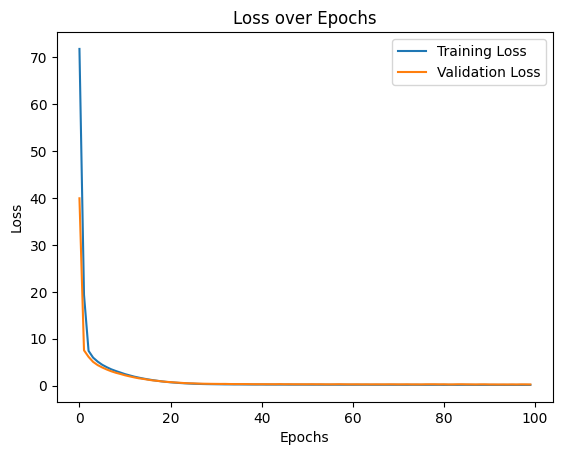

In [ ]:
#@title DL para prediccion de alcohol esperado en el vino
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import SMOTE


# Supongamos que queremos predecir el contenido de alcohol
X = df.drop(['quality', 'alcohol'], axis=1)  # Excluimos 'quality' y 'alcohol'
y = df['alcohol']  # La propiedad a predecir

# Dividir los datos en entrenamiento y prueba (80%-20%) con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo de red neuronal para regresión
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Regresión, salida continua

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test MAE (Mean Absolute Error): {score[1]}")

# Visualizar los resultados de la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


###DT Regression by Oscar
El siguiente modelo utiliza Árboles de Decisión para predecir la acidez fija de un vino en función de su densidad. Este enfoque permite visualizar cómo diferentes profundidades de árboles impactan la predicción, ofreciendo una comparación entre modelos más simples y modelos más complejos.

Para la construcción del modelo se realizó lo siguiente:
1. mportación de librerías correspondientes:

  - Se importaron las librerías necesarias, como numpy, matplotlib y scikit-learn, que proporcionan las herramientas para la manipulación de datos, la visualización y la implementación de modelos de regresión.

2. Selección de variables:

  - Se eligieron las variables predictoras y la variable objetivo para el modelo: X es la columna de densidad de los vinos, mientras que y es la acidez fija. Estas variables fueron seleccionadas debido a su relevancia en el contexto de la calidad del vino y la naturaleza de la relación entre la densidad y la acidez fija. Además, las variables tienen una correlación de 0.67, lo que indica una relación moderada y positiva entre ellas, lo que justifica su elección para el modelo.

3. Entrenamiento de los modelos:

  - Se construyeron dos modelos de Árbol de Decisión con diferentes profundidades: un árbol con profundidad máxima de 2 y otro con profundidad máxima de 10. La diferencia en la profundidad permite comparar el comportamiento de los modelos más simples y los más complejos.

  - El modelo de profundidad 2 es más simple y tiende a subajustar los datos, lo que puede resultar en una capacidad limitada para captar patrones complejos. En cambio, el modelo de profundidad 10 es más complejo y tiene mayor capacidad para ajustar los datos, lo que puede llevar a un sobreajuste.

4. Predicciones y graficación:

  - Después de entrenar los modelos, se generaron predicciones para un conjunto de valores de densidad (entre el mínimo y el máximo de X) y se graficaron los resultados junto con los datos reales. La visualización muestra cómo las predicciones de los dos modelos se ajustan a los datos, permitiendo observar las diferencias en las curvas de ajuste.

  - El modelo con profundidad 2 tiene una curva más suave, mientras que el modelo con profundidad 10 sigue los datos más de cerca, pero con una mayor variabilidad.

5. Evaluación del modelo:

  - Se utilizó K-Fold Cross-Validation (con 10 particiones) para evaluar la capacidad generalizadora de los modelos y obtener una medida más robusta de su rendimiento. Se utilizó la métrica del Error Cuadrático Medio (MSE) para comparar el desempeño de ambos modelos en diferentes particiones de los datos.

  - La validación cruzada ayuda a obtener una visión más precisa del rendimiento del modelo, ya que realiza el entrenamiento y la evaluación en diferentes subconjuntos del conjunto de datos, lo que minimiza el riesgo de sobreajuste.

6. Cálculo de MSE:

  - El MSE para ambos modelos se reportó, proporcionando una medida cuantitativa de qué tan bien los modelos ajustan los datos. A pesar de que el modelo con mayor profundidad reportó menor error, se debe tener en cuenta su sensibilidad al ruido.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


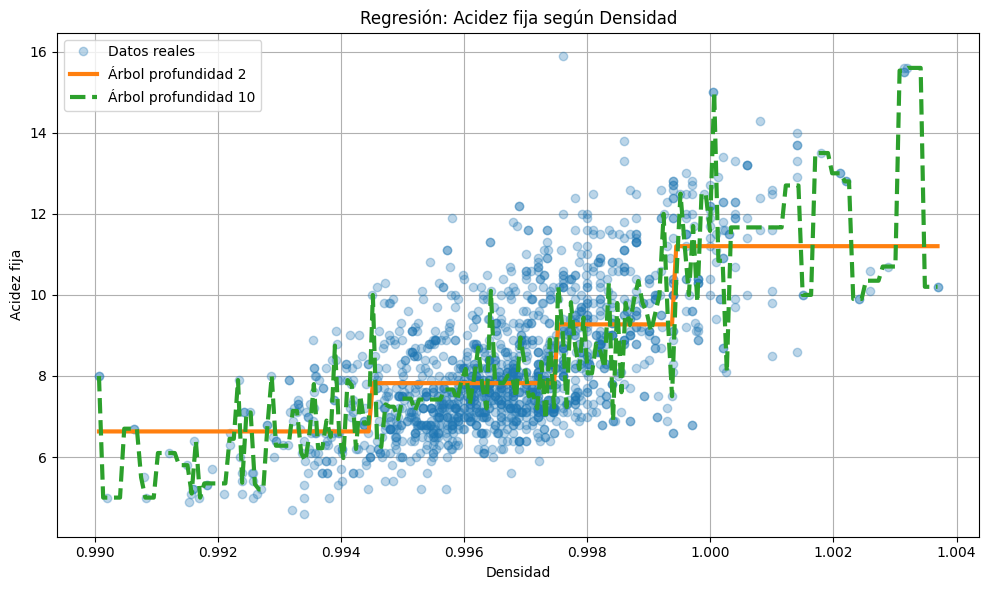

MSE profundidad 2: 1.815 (+/- 0.25599)
MSE profundidad 10: 1.731 (+/- 0.24988)


In [ ]:
#@title **DT Regression  by Oscar**
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

# Variables predictora y objetivo
X = df[['density']]
y = df['fixed acidity']

# Modelos con diferente profundidad
regressor = DecisionTreeRegressor(max_depth=2)
regressorSA = DecisionTreeRegressor(max_depth=10)

# Entrenamiento
regressor.fit(X, y)
regressorSA.fit(X, y)

# Predicciones para graficar
xx = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_pred_1 = regressor.predict(xx)
y_pred_2 = regressorSA.predict(xx)

# Graficar resultados
plt.figure(figsize=(10,6))
plt.plot(X, y, 'o', alpha=0.3, label='Datos reales')
plt.plot(xx, y_pred_1, linewidth=3, label='Árbol profundidad 2')
plt.plot(xx, y_pred_2, linewidth=3, linestyle='--', label='Árbol profundidad 10')
plt.xlabel('Densidad')
plt.ylabel('Acidez fija')
plt.title('Regresión: Acidez fija según Densidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluación con K-Fold cross-validation (MSE)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scorer = make_scorer(mean_squared_error)

s1 = cross_val_score(regressor, X, y, cv=kf, scoring=scorer)
print("MSE profundidad 2: %.3f (+/- %.5f)" % (np.mean(s1), np.std(s1)))

s2 = cross_val_score(regressorSA, X, y, cv=kf, scoring=scorer)
print("MSE profundidad 10: %.3f (+/- %.5f)" % (np.mean(s2), np.std(s2)))

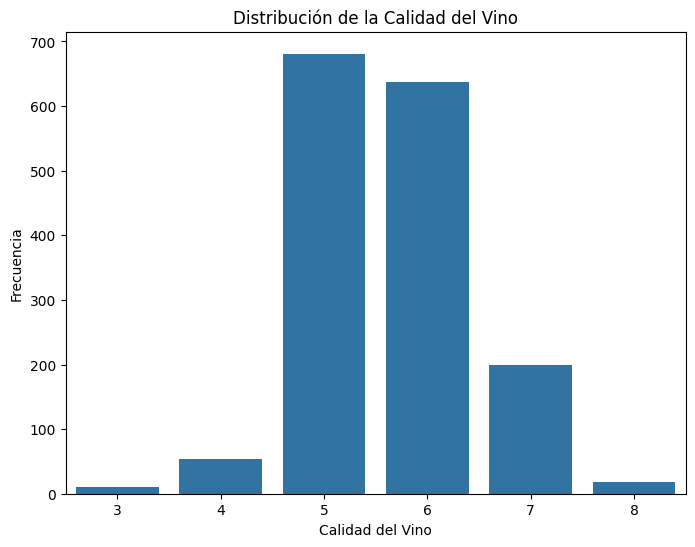

In [ ]:
#@title Argumentacion

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura si es necesario
sns.countplot(x='quality', data=df)  # 'quality' es la columna que contiene los tipos de calidad
plt.title('Distribución de la Calidad del Vino')  # Agrega un título al gráfico
plt.xlabel('Calidad del Vino')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.show()  # Muestra el gráfico


###K-Means

El siguiente modelo aplica un enfoque no supervisado utilizando K-Means clustering para agrupar los vinos en función de sus características fisicoquímicas. A diferencia de los modelos supervisados, este modelo no utiliza la variable "quality" para entrenarse, sino que descubre patrones en los datos únicamente a partir de sus atributos.

Para la construcción del modelo se realizó lo siguiente:

1. Importación de librerías correspondientes:

  Se importaron librerías esenciales como pandas, numpy, matplotlib, scikit-learn y PCA para reducción de dimensionalidad.

2. Preprocesamiento de Datos:

  * Se eliminó la columna quality del conjunto de datos, ya que el objetivo era aplicar clustering sin conocer las clases reales.

  * Se aplicó StandardScaler para escalar las características, lo cual es fundamental en modelos como K-Means que dependen de cálculos de distancia. Esto garantiza que todas las variables contribuyan de manera equitativa al agrupamiento.

3. Reducción de dimensionalidad con PCA:

  Para facilitar la visualización, se utilizó Análisis de Componentes Principales (PCA) para proyectar los datos en un espacio de 2 dimensiones. Esta transformación conserva la mayor cantidad posible de la varianza original, permitiendo observar gráficamente los agrupamientos generados por K-Means.

4. Determinación del número óptimo de clusters (k):

  * Se empleó el método del codo, que consiste en evaluar la inercia (suma de las distancias cuadradas internas al cluster) para distintos valores de k (de 2 a 10).

  * Se observó en el gráfico del codo que k = 6 parecía un punto adecuado donde la inercia deja de decrecer significativamente. Este valor fue seleccionado como el número óptimo de clusters para el modelo final.

5. Entrenamiento del modelo:

  Se aplicó el algoritmo KMeans con k = 6, utilizando n_init='auto' y una semilla aleatoria (random_state=21) para asegurar reproducibilidad. El modelo asignó cada observación a uno de los 6 clusters formados.

6. Visualización de resultados:

  Se mostraron dos gráficos:

  El primero representa el método del codo, con la inercia frente al número de clusters, lo cual permite visualizar cómo cambia la cohesión de los clusters al variar k.

  El segundo muestra los resultados del clustering en 2D, utilizando los componentes principales generados por PCA. Cada punto representa un vino, y el color representa el cluster asignado por el modelo. También se agregó una leyenda para distinguir visualmente cada cluster.

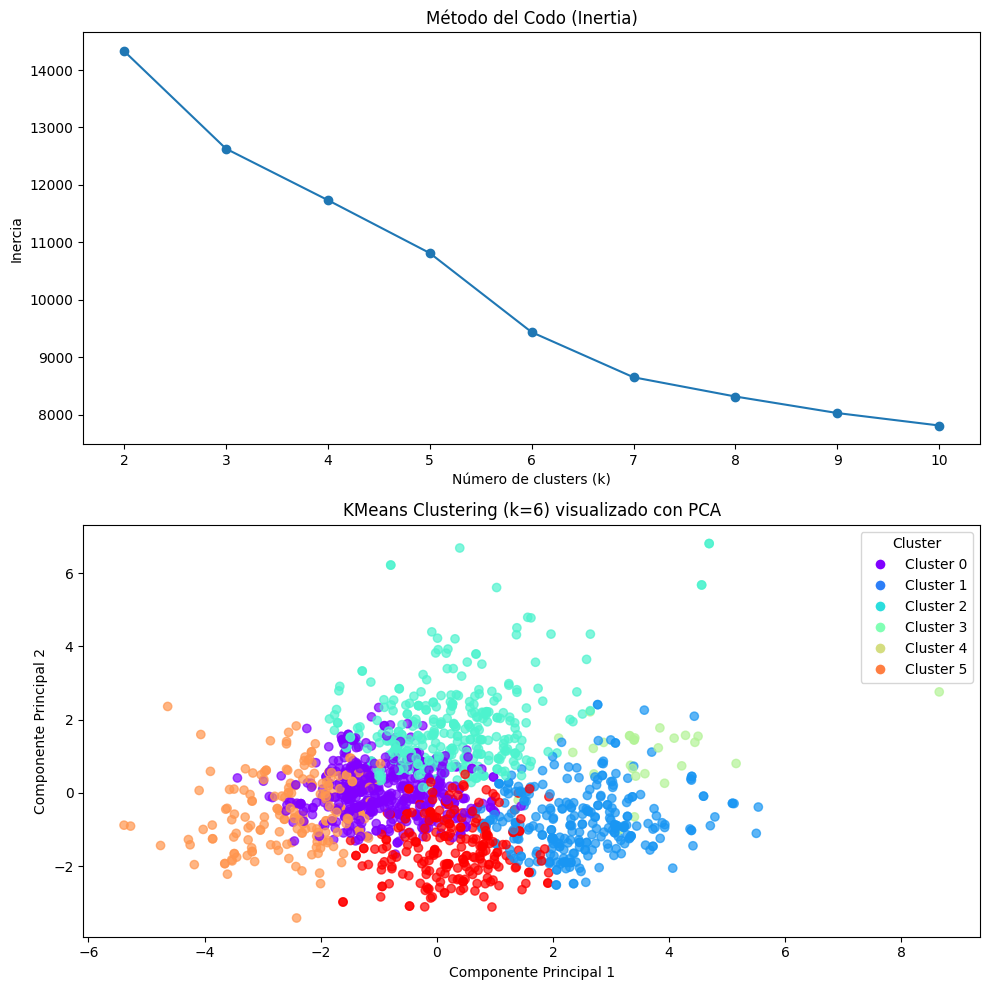

In [ ]:
#@ KMEANS Y PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Preprocesamiento: escalar los datos (excluyendo 'quality')
X = df.drop("quality", axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducir a 2 dimensiones con PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Método del codo para determinar el mejor valor de k
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Entrenar KMeans con k=6 (valor elegido)
k_opt = 6
kmeans_final = KMeans(n_clusters=k_opt, random_state=42, n_init="auto")
clusters = kmeans_final.fit_predict(X_scaled)

# Visualización
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Gráfico del codo
axs[0].plot(k_range, inertia, marker='o')
axs[0].set_title('Método del Codo (Inertia)')
axs[0].set_xlabel('Número de clusters (k)')
axs[0].set_ylabel('Inercia')

# Clustering visualizado con PCA
scatter = axs[1].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='rainbow', alpha=0.7)
axs[1].set_title(f'KMeans Clustering (k={k_opt}) visualizado con PCA')
axs[1].set_xlabel('Componente Principal 1')
axs[1].set_ylabel('Componente Principal 2')

# Leyenda de clusters
legend_labels = [f'Cluster {i}' for i in np.unique(clusters)]
handles = [plt.Line2D([], [], marker='o', color='w', label=label,
                      markerfacecolor=plt.cm.rainbow(i / k_opt), markersize=8)
           for i, label in enumerate(legend_labels)]
axs[1].legend(handles=handles, title='Cluster')

plt.tight_layout()
plt.show()

Número de puntos en cada clúster (incluyendo ruido -1):
dbscan_cluster
 0    1144
-1     455
Name: count, dtype: int64


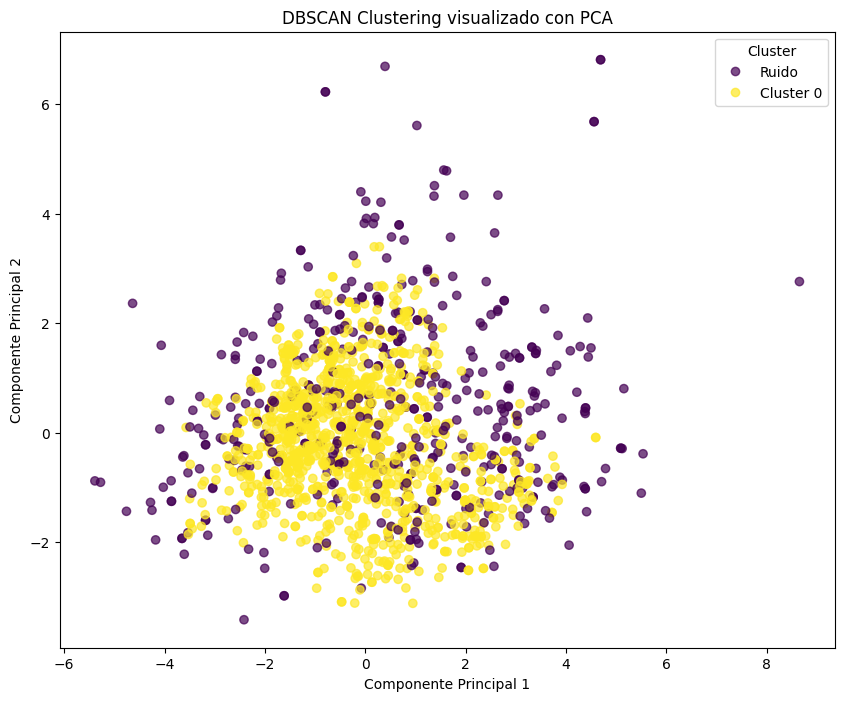

In [ ]:
#@title **DBSCAN para vinos**

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

X = df.drop("quality", axis=1) # Puedes incluir 'quality' si quieres que influya en el clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# eps (epsilon): La distancia máxima entre dos muestras para que una sea considerada como en la vecindad de la otra.
# min_samples: El número de muestras en una vecindad para que un punto sea considerado como un punto central.
# Estos parámetros requieren ajuste y pueden variar dependiendo de la naturaleza de tus datos.
dbscan = DBSCAN(eps=1.5, min_samples=10)
clusters = dbscan.fit_predict(X_scaled)

df['dbscan_cluster'] = clusters

# -1 en las etiquetas de clúster indica ruido (outliers)
print("Número de puntos en cada clúster (incluyendo ruido -1):")
print(df['dbscan_cluster'].value_counts())

# Dado que tienes 11 características, visualizaremos usando las dos primeras componentes principales para simplificar.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
# Colorea los puntos según las etiquetas de clúster de DBSCAN
# Los puntos con etiqueta -1 serán de un color diferente (generalmente se representan como ruido)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering visualizado con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Crear una leyenda para los clústeres
legend_labels = [f'Cluster {i}' if i != -1 else 'Ruido' for i in np.unique(clusters)]
handles = scatter.legend_elements()[0]
plt.legend(handles=handles, labels=legend_labels, title='Cluster')

plt.show()

La pobre clasificación de los clústeres por DBSCAN en este dataset de calidad de vino puede deberse a varias razones, muchas de ellas relacionadas con las características del dataset y cómo DBSCAN opera:

* Naturaleza Continua y Superpuesta de los Datos: La calidad del vino (y las características fisicoquímicas que la determinan) a menudo varía de manera continua. Los diferentes niveles de calidad no suelen formar grupos discretos y bien separados en el espacio de características. En lugar de tener "bolas" densas y distintas de puntos, es probable que las diferentes "cualidades" se superpongan en el espacio de características. DBSCAN funciona mejor cuando los clústeres son regiones de alta densidad separadas por regiones de baja densidad. Si los datos están más distribuidos de manera gradual o difusa, DBSCAN puede tener dificultades para delimitar estos grupos.

* El "Ruido" en los Datos: Aunque no es "ruido" en el sentido de errores de medición, la variación natural en las propiedades del vino para una calidad dada puede hacer que muchos puntos no tengan suficientes vecinos cercanos dentro del radio eps. Esto lleva a que sean clasificados como ruido por DBSCAN. El dataset de calidad del vino puede tener una variabilidad considerable dentro de cada nivel de calidad, lo que dificulta encontrar regiones consistentemente densas.

* Sensibilidad a los Parámetros eps y min_samples: DBSCAN es muy sensible a la elección de sus dos parámetros principales: eps (el radio de vecindad) y min_samples (el número mínimo de puntos en una vecindad para ser un punto central). Si eps es demasiado pequeño, incluso puntos que intuitivamente deberían estar en el mismo clúster serán clasificados como ruido. Si eps es demasiado grande, diferentes clústeres pueden fusionarse en uno solo, y el ruido puede ser absorbido por los clústeres. Mientras si min_samples es demasiado alto, se encontrarán menos puntos centrales y muchos puntos serán clasificados como ruido.

En un dataset donde la densidad varía significativamente o donde los "clústeres" no tienen una densidad uniforme, encontrar un par de valores eps y min_samples que funcione bien para todos los grupos es un desafío. La elección de eps=1.5 y min_samples=10 en este caso particular podría no ser óptima para la estructura real de los datos.

Aunque el PCA se usa para visualización, DBSCAN se aplica a los datos escalados con las 11 características originales. En espacios de alta dimensión, las distancias entre puntos tienden a ser menos significativas, lo que hace más difícil definir un radio eps efectivo para encontrar regiones densas. Las 11 características, aunque no extremadamente altas, ya pueden empezar a presentar este problema si las relaciones entre las características no crean agrupaciones claras en este espacio.

En resumen, si la salida de DBSCAN muestra un alto porcentaje de puntos clasificados como ruido y/o pocos clústeres significativos, la justificación más probable es que la estructura de densidad de los datos de calidad de vino no se alinea bien con los supuestos de DBSCAN: los grupos no son regiones de alta densidad claramente separadas por regiones de baja densidad, y la variabilidad dentro de los "grupos" puede hacer que muchos puntos no cumplan el criterio de densidad para formar parte de un clúster. Es posible que otros algoritmos de clustering, como K-MeansM o algoritmos jerárquicos, entre otros, puedan ofrecer mejores resultados si las relaciones entre las variables lo permiten.

# ***Comparación entre modelos supervisados y no supervisados***

En el proyecto se utilizaron modelos de aprendizaje supervisado (como Random Forest o una red neuronal para predecir la calidad del vino), y como modelos de aprendizaje no supervisado (como K-Means o DBSCAN para identificar agrupamientos dentro del conjunto de datos). A continuación se explica por qué no es apropiado comparar ambos  utilizando las mismas métricas.

Diferencias fundamentales entre los enfoques:
La diferencia clave entre ambos enfoques radica en su objetivo y en el tipo de datos con los que trabajan:

Los modelos supervisados se entrenan con datos etiquetados, es decir, cada ejemplo del conjunto de entrenamiento incluye la variable objetivo (en este caso, la calidad del vino). Su propósito es aprender a predecir dicha etiqueta a partir de las características disponibles. Por esto, se evalúan con métricas como precisión, recall, F1-score o matriz de confusión, que permiten medir qué tan bien predice el modelo las clases reales.

Por el contrario, los modelos no supervisados trabajan con datos no etiquetados. Su objetivo no es predecir una clase, sino encontrar patrones ocultos o estructuras dentro de los datos, como agrupamientos (clustering) o reducción de dimensionalidad. Como no se dispone de una respuesta correcta con la cual comparar, las métricas de evaluación típicas de clasificación no aplican directamente.

**Análisis y comparación indirecta:**
A pesar de estas diferencias, se propone una comparación indirecta de los modelos no supervisados en uno de los contextos del problema, y analizar cómo pueden complementar a los modelos supervisados.

Utilización de los clusters como nuevas características: Una estrategia consiste en usar las etiquetas de los clusters generados por algoritmos como K-Means o DBSCAN como una nueva variable dentro del modelo supervisado. Se entrena un modelo supervisado (por ejemplo, Random Forest) dos veces: una con las características originales y otra incluyendo también los clusters como variable adicional. Si el modelo mejora sus métricas al incorporar esta información, se puede inferir que los agrupamientos contienen patrones relevantes para la predicción de la calidad.